In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from Util.Util import DataUtil

(x, y), (x_test, y_test) = DataUtil.gen_noisy_linear(one_hot=False)
x_train, x_cv = x[:9000], x[9000:]
y_train, y_cv = y[:9000], y[9000:]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_losses(*models):
    plt.figure()
    for nn in models:
        name = str(nn)
        el, csl = nn.log["epoch_loss"], nn.log["cv_snapshot_loss"]
        ee_base = np.arange(len(el))
        cse_base = np.linspace(0, len(el) - 1, len(csl))
        plt.plot(ee_base, el, label="Train loss ({})".format(name))
        plt.plot(cse_base, csl, label="CV loss ({})".format(name))
        plt.legend()
    plt.show()

In [3]:
from _Dist.NeuralNetworks.c_BasicNN.NN import Basic

basic = Basic(x_train, y_train, x_cv, y_cv).fit()

Epoch    1   Iter  125   Snapshot    3 (acc)  -  Train : 0.882222   CV :    0.815  -  Current run (3) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    2   Iter  155   Snapshot    6 (acc)  -  Train : 0.921111   CV :    0.821  -  Current run (6) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch   32   Iter 1097   Snapshot   97 (acc)  -  Train :      1.0   CV :    0.796  -  Extending n_epoch to 37
Epoch   37   Iter 1427   Snapshot  112 (acc)  -  Train :      1.0   CV :    0.798  -  Extending n_epoch to 42
Epoch   42   Iter 1849   Snapshot  128 (acc)  -  Train :      1.0   CV :    0.797  -  Extending n_epoch to 47
Epoch   47   Iter 2279   Snapshot  143 (acc)  -  Train :      1.0   CV :    0.795  -  Extending n_epoch to 52
Epoch   51   Iter 2709   Snapshot  155 (acc)  -  Train :      1.0   CV :    0.794  -  Early stopped at n_epoch=51 due to 'Performance not improving'
  -  Rolling back to the best check

In [4]:
from _Dist.NeuralNetworks.e_AdvancedNN.NN import Advanced

numerical_idx = [True] * 100 + [False]
categorical_columns = []

In [5]:
wnd = Advanced(
    x_train, y_train, x_cv, y_cv, use_dndf=False, use_pruner=False,
    numerical_idx=numerical_idx, categorical_columns=categorical_columns
).fit()

Epoch    1   Iter   83   Snapshot    2 (acc)  -  Train : 0.838889   CV :    0.785  -  Current run (2) leads to best result we've ever had, saving checkpoint since performance has improved significantly
Epoch    1   Iter  125   Snapshot    3 (acc)  -  Train : 0.835556   CV :    0.812  -  Current run (3) leads to best result we've ever had, saving checkpoint since performance has improved significantly
Epoch    2   Iter  155   Snapshot    6 (acc)  -  Train :     0.88   CV :    0.813  -  Current run (6) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    3   Iter  185   Snapshot    9 (acc)  -  Train : 0.868889   CV :    0.826  -  Current run (9) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch   26   Iter  833   Snapshot   77 (acc)  -  Train : 0.974444   CV :    0.815  -  Early stopped at n_epoch=26 due to 'Over-fitting'
  -  Rolling back to the best checkpoint
INFO:tensorflow:Restoring parameters from _

In [6]:
wnd_dndf = Advanced(
    x_train, y_train, x_cv, y_cv, use_dndf=True, use_pruner=False,
    numerical_idx=numerical_idx, categorical_columns=categorical_columns
).fit()

D:\Software\Dev\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch    1   Iter  125   Snapshot    3 (acc)  -  Train : 0.853333   CV :    0.816  -  Current run (3) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    2   Iter  155   Snapshot    6 (acc)  -  Train : 0.851111   CV :    0.831  -  Current run (6) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    5   Iter  245   Snapshot   15 (acc)  -  Train : 0.895556   CV :    0.835  -  Current run (15) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch   17   Iter  521   Snapshot   49 (acc)  -  Train : 0.967778   CV :    0.819  -  Early stopped at n_epoch=17 due to 'Over-fitting'
  -  Rolling back to the best checkpoint
INFO:tensorflow:Restoring parameters from _Models\AdvancedNN_(256, 256)\tmp\Model
  -  Time Cost: 23.624905347824097


In [7]:
wnd_dndf_pruned = Advanced(
    x_train, y_train, x_cv, y_cv, use_dndf=True, use_pruner=True,
    numerical_idx=numerical_idx, categorical_columns=categorical_columns
).fit()

D:\Software\Dev\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch    1   Iter  125   Snapshot    3 (acc)  -  Train : 0.888889   CV :    0.837  -  Current run (3) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    9   Iter  365   Snapshot   27 (acc)  -  Train : 0.897778   CV :    0.839  -  Current run (27) leads to best result we've ever had, saving checkpoint since performance has improved significantly
Epoch   12   Iter  455   Snapshot   36 (acc)  -  Train : 0.897778   CV :     0.84  -  Current run (36) leads to best result we've ever had, saving checkpoint since performance has improved significantly
Epoch   32   Iter 1097   Snapshot   97 (acc)  -  Train : 0.964444   CV :    0.826  -  Extending n_epoch to 37
Epoch   37   Iter 1427   Snapshot  112 (acc)  -  Train : 0.971111   CV :    0.834  -  Extending n_epoch to 42
Epoch   38   Iter 1605   Snapshot  114 (acc)  -  Train :     0.97   CV :    0.823  -  Early stopped at n_epoch=38 due to 'Over-fitting'
  -  Rolling back to the best checkpoint
INFO:tens

BasicNN              acc  -  Train : 0.927556   CV :    0.821   Test : 0.908667
WnD                  acc  -  Train :    0.879   CV :    0.826   Test :    0.942
WnD & DNDF           acc  -  Train : 0.903333   CV :    0.835   Test : 0.939333
WnD & DNDF & Pruner  acc  -  Train : 0.921889   CV :     0.84   Test : 0.942667


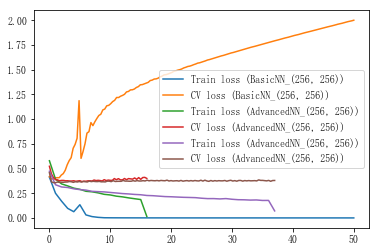

In [8]:
print("BasicNN              ", end="")
basic.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
print("WnD                  ", end="")
wnd.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
print("WnD & DNDF           ", end="")
wnd_dndf.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
print("WnD & DNDF & Pruner  ", end="")
wnd_dndf_pruned.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
draw_losses(basic, wnd_dndf, wnd_dndf_pruned)